In [19]:
# 导入一些包
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

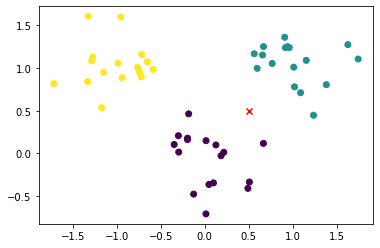

In [6]:
# 模拟出一些数据集出来

#r = np.random.randint(1,100)
r = 4
#print(r)
k = 3
x , y = make_blobs(n_samples = 50,
                   cluster_std = [0.3, 0.3, 0.3],
                   centers = [[0,0],[1,1],[-1,1]]
                   ,random_state = r
                  )
sim_data = pd.DataFrame(x, columns = ['x1', 'x2'])
sim_data['label'] = y
sim_data.head(5)

datasets = sim_data.copy()

# 设置测试点

p = [0.5, 0.5]

plt.scatter(sim_data['x1'], sim_data['x2'], c = y)
plt.scatter(0.5, 0.5, c = 'red', marker = 'x')

In [7]:
# 计算每一个点到测试点距离的平方

X = datasets.iloc[:,:-1]
y = datasets.iloc[:, -1]

d = np.power(X - p, 2).sum(axis = 1)

In [8]:
# 把计算出来的距离与标签拼接起来

df_dist = pd.DataFrame({'dist' : d, 'label' : y})

In [9]:
# 确认前k个点
k = 3

In [10]:
# 开始投票

df_dist.sort_values(by = 'dist').iloc[:k, -1].mode().values[0]

0

In [11]:
# 封装成一个函数
def knn_classify(p, datasets, k):
    X = datasets.iloc[:,:-1]
    y = datasets.iloc[:, -1]
    d = np.power(X - p, 2).sum(axis = 1)
    df_dist = pd.DataFrame({'dist' : d, 'label' : y})
    predict = df_dist.sort_values(by = 'dist').iloc[:k, -1].mode().values[0]
    return predict

In [12]:
# 测试
knn_classify(p = [0,1], datasets = datasets, k = 5)

1

In [13]:
# 尝试其它的数据集

rowdata={'电影名称':['无问西东','后来的我们','前任3','红海行动','唐人街探案','战狼2'],
         '打斗镜头':[1,5,12,108,112,115],
         '接吻镜头':[101,89,97,5,9,8],
         '电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片']} 

movie_data=pd.DataFrame(rowdata)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


In [14]:
datasets = movie_data.iloc[:, 1:]
knn_classify([35,100],datasets,k=5)

'爱情片'

In [15]:
# sklearn 实现

X , y = make_blobs(n_samples = 50,
                   cluster_std = [0.3, 0.3, 0.3],
                   centers = [[0,0],[1,1],[-1,1]]
                   ,random_state = r
                  )

p = [[0, 1]]

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)   #实例化
clf.fit(X, y)    #训练数据
clf.predict(p)   #预测数据

array([1])

In [23]:
# breast_cancer 数据集

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer


# 探索数据集
data = load_breast_cancer()


In [17]:
x = data['data']
y = data['target']

In [26]:
dir(sklearn.datasets)#sklearn自带数据集

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [27]:
name = ['平均半径','平均纹理','平均周长','平均面积',
        '平均光滑度','平均紧凑度','平均凹度',
        '平均凹点','平均对称','平均分形维数',
        '半径误差','纹理误差','周长误差','面积误差',
        '平滑度误差','紧凑度误差','凹度误差',
        '凹点误差','对称误差',
        '分形维数误差','最差半径','最差纹理',
        '最差的边界','最差的区域','最差的平滑度',
        '最差的紧凑性','最差的凹陷','最差的凹点',
        '最差的对称性','最差的分形维数']

#pd.DataFrame(x, columns = name)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors =10)   #实例化
clf.fit(x, y)

KNeighborsClassifier(n_neighbors=10)

In [28]:
#模型准确率
clf.score(x, y)

0.9420035149384886

In [29]:
#准确率的计算过程
total_data = pd.DataFrame(x, columns = name)
total_data['Y'] = y
total_data['Y_pred'] = clf.predict(x)
(total_data['Y'] == total_data['Y_pred']).sum() / x.shape[0]

0.9420035149384886

In [30]:
# 划分训练集和测试集,自身数据划分
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
                                                    
# andom_state = 420
                                                    
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(x_train, y_train)
clf.score(x_train, y_train), clf.score(x_test, y_test)

(0.9340659340659341, 0.9649122807017544)

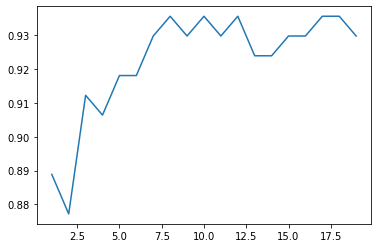

In [35]:
# 建立模型&评估模型
# 选取最优的K值

# 更换不同的n_neighbors参数的取值，观察结果的变化

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 420)
                                                   
# 绘制学习曲线

import matplotlib.pyplot as plt

score = []
krange = range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train)
    score.append(clf.score(x_test, y_test))

plt.plot(krange, score)

In [36]:
# 交叉验证

In [38]:
from sklearn.model_selection import cross_val_score as CVS

clf = KNeighborsClassifier(n_neighbors = 3)
cvresult = CVS(clf, x, y, cv = 6)
cvresult

array([0.89473684, 0.92631579, 0.93684211, 0.95789474, 0.92631579,
       0.91489362])

In [39]:
# 均值：查看模型的平均效果
cvresult.mean()

0.9261664800298619

In [40]:
# 方差：查看模型是否稳定
cvresult.var()

0.00037259923692786463

12
0.9332401800962584


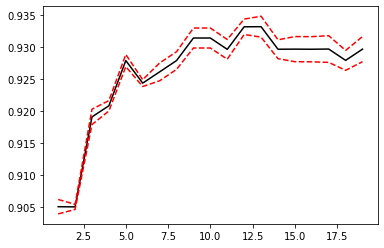

In [49]:
# 绘制带交叉验证的学习曲线
score = []
var_ = []
krange=range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,x,y,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')

bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])


In [50]:
# 归一化

from sklearn.preprocessing import MinMaxScaler 

data = [[-1,2],[-0.5,6],[0,10],[1,18]]

# 如果换成表是什么样子？
d = pd.DataFrame(data)
d

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [51]:
# 实现归一化
scaler = MinMaxScaler()
scaler.fit(d)
scaler.transform(d)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [52]:
# 训练和导出结果一步达成 一步操作
scaler.fit_transform(d)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

12
0.9648657040832169


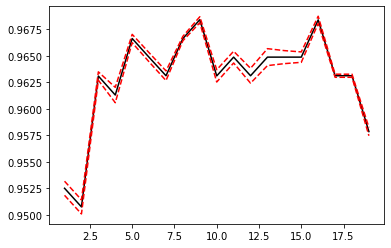

In [62]:
from sklearn.preprocessing import MinMaxScaler as mms
data = load_breast_cancer()
x = data.data
y = data.target

MMS = mms()
MMS.fit(x)
x_new = MMS.transform(x)

score = []
var_ = []
krange=range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,x_new,y,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')

#pd.Series(score, index = krange).idxmax()
print(bestindex)
print(score[bestindex])

In [63]:
# 最好的k值是等于9

12
0.9648657040832169


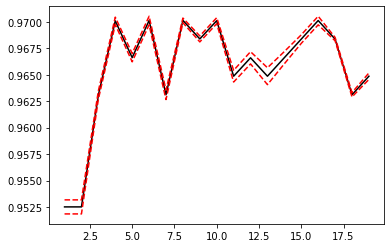

In [66]:
score = []
var_ = []
krange=range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    cvresult = CVS(clf,x_new,y,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')

#pd.Series(score, index = krange).idxmax()
print(bestindex)
print(score[bestindex])

In [ ]:
'''



'''